<h1>TD 1</h1>

1) Rappeler ce qu’est un spectre en amplitude ?

Un spectre en amplitude est la représentation des amplitudes |Sn| en fonction des fréquences fn = nf0.

2. Que pouvez-vous dire sur les signaux dont les spectres en amplitude sont représentés ci-dessus ? (périodicité,
contenu fréquentiel, etc?). Indiquer à quelles fréquences se situent les pics, que remarquez-vous ?


Les deux signaux ont tous les deux des grandes amplitudes (~8.5 1e6 amplitude) en début de fréquence puis de très basses amplitudes (- de 2 1e6 ua). Il n'y a pas de périodicité dans ces échantillons. Il y a un grand pic de + 8 1e6 ua en 200 Hz dans les deux .

3. Définir un signal sinusoïdal de fréquence f0 sur 1.2 secondes et le représenter sur 3 périodes. Pour cela
vous aurez besoin de d´efinir un vecteur de temps, et une fonction qui retourne les valeurs de la sinusoïde
pour chaque instant. Vous définirez également une fonction rectangle de fenêtre a (en secondes), centrée
sur le temps m (en secondes aussi), par défaut cette fonction sera centrée sur le milieu des temps. Tracer
ces deux fonctions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
Fs = 8000  # Fréquence d'échantillonnage
T = 1.2  # Durée totale du signal en secondes
t = np.linspace(0, T, int(Fs * T), endpoint=False)  # Vecteur de temps

def sinusoide(tps, f0):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # f0 : fréquence fondamentale, inverse de la période fondamentale
    return np.sin(2*np.pi*f0*tps)

def rectangle(tps, a, fs, m = None):
    # tps: vecteurs de temps correspondant à l'échantillonnage
    # a : largeur de la fenêtre (en secondes) où le rectangle vaut 1.
    # attention ici on placera par défaut le temps t=0 au milieu
    n = len(tps)
    if m:
        n1 = int(m*fs) - int(a*fs/2)
        n2 = int(m*fs) + int(a*fs/2)
    else:
        n1 = n//2 - int(a*fs/2)
        n2 = n//2 + int(a*fs/2)
    rec = np.zeros(n)
    rec[n1:n2] = 1
    return rec

In [2]:
duree_silence_debut = 0.1  
duree_voyelle = 0.5  # les voyelles "u" et "euh"

#Le signal "u" en multipliant le signal sinusoïdal par une fenêtre rectangulaire
f0_u = 195  # Fréquence pour "u" (changer pour avoir moins de période)
#signal_u = signal_sinusoïdal(f0_u, t) * fenetre_rectangulaire(t, duree_voyelle, duree_silence_debut + duree_voyelle / 2)
signal_u = sinusoide(t,f0_u) * rectangle(t, duree_voyelle,Fs)

duree_silence_fin = 0.1  # 0,1 seconde de silence à la fin

# Le signal "euh" en multipliant le signal sinusoïdal par une fenêtre rectangulaire
f0_euh = 195  # Fréquence pour "euh" 
#signal_euh = sinusoïdal(f0_euh, t) * fenetre_rectangulaire(t, duree_voyelle, duree_silence_debut + duree_voyelle + duree_silence_fin + duree_voyelle / 2)
signal_euh = sinusoide(t,f0_euh) * rectangle(t, duree_voyelle,Fs)


In [3]:
signal_final = signal_u + signal_euh

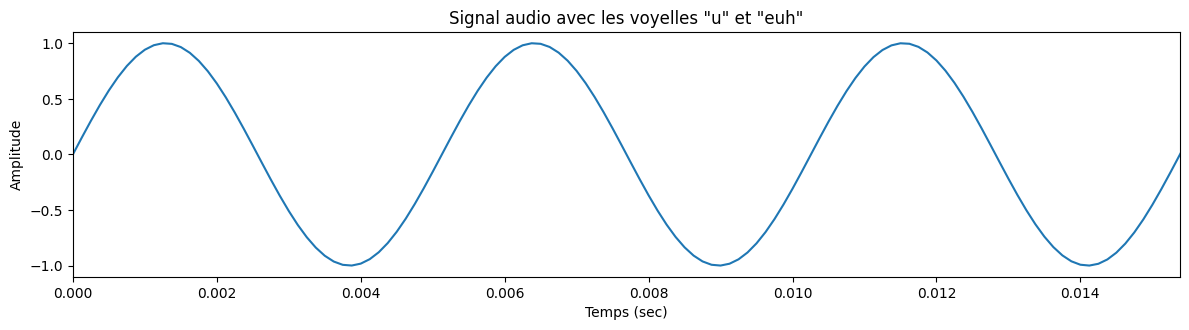

In [4]:
y=sinusoide(t,f0_u)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.xlim(0,3*(1/f0_euh))
plt.title('Signal audio avec les voyelles "u" et "euh"')
plt.xlabel('Temps (sec)')
plt.ylabel('Amplitude')

"""
plt.subplot(2, 1, 2)
plt.plot(t, fenetre_rectangulaire(t, duree_voyelle, duree_silence_debut + duree_voyelle / 2), label='u')
plt.plot(t, fenetre_rectangulaire(t, duree_voyelle, duree_silence_debut + duree_voyelle + duree_silence_fin + duree_voyelle / 2), label='euh')
plt.title('Fenêtres rectangulaires pour les voyelles "u" et "euh"')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
"""
plt.tight_layout()
plt.show()


4. On cherche à présent à modéliser la séquence de pics observée sur les deux spectres. Dans un premier
temps, on considèrera que les valeurs des hauteurs des pics sont les suivantes :
• c0 = 0 (pas de composante continue)
• c1 = 8.2
• cn = cn−1/4
• Si nf0 > 3000 on considère cn = 0
Donner l’expression mathématique de ce signal et tracer son spectre en amplitude en justifiant la méthode
utilisée.

L'expression mathématique est la suivante :

$$x(t) = c_0 + \sum_{n=1}^{\infty} c_n \sin(2 \pi n f_0 t)$$

C:\Users\A052080\AppData\Local\Temp\ipykernel_17304\350801868.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  signal = c0 + np.sum(c[n] * np.sin(2 * np.pi * n * f0 * t) for n in range(N))


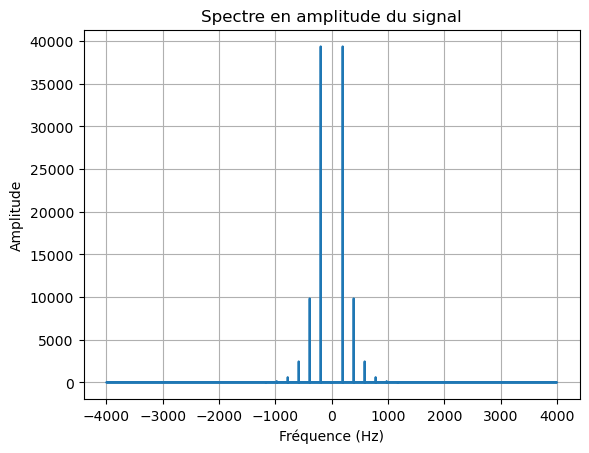

In [84]:
f0=195
# Calcul des coefficients harmoniques
c0 = 0
c1 = 8.2
N = 50  # Nombre d'harmoniques à prendre en compte
c = np.zeros(N)
c[1] = c1
for n in range(2, N):
    c[n] = c[n-1] / 4
    if n * f0 > 3000:
        c[n] = 0

# Calcul du signal
signal = c0 + np.sum(c[n] * np.sin(2 * np.pi * n * f0 * t) for n in range(N))

# Calcul du spectre en amplitude
amplitude_spectrum = np.abs(np.fft.fft(signal))
frequencies = np.fft.fftfreq(len(amplitude_spectrum), 1 / Fs)

# Tracé du spectre en amplitude
plt.plot(frequencies, amplitude_spectrum)
plt.title('Spectre en amplitude du signal')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

C:\Users\A052080\AppData\Local\Temp\ipykernel_17304\1108727617.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  signal = c0 + np.sum(c[n] * np.sin(2 * np.pi * n * f0 * t) for n in range(N))


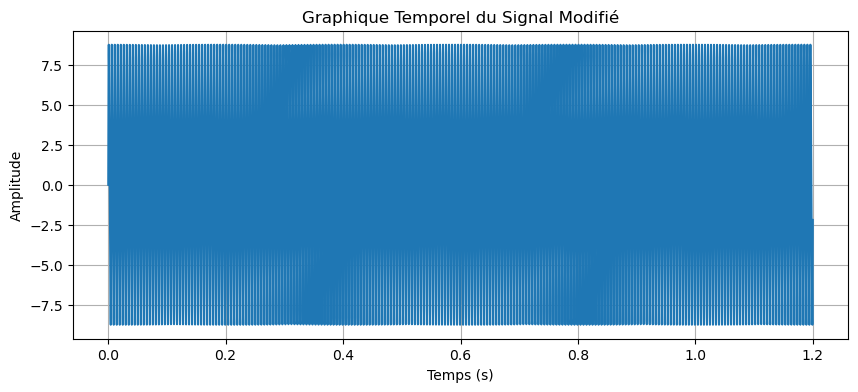

In [89]:
# Paramètres des formants pour la voyelle "/a/"
F1_a = 330  # Hz
F2_a = 2050  # Hz
F3_a = 2420  # Hz

# Modifier les coefficients harmoniques en fonction des formants
bandwidth = 100  # Largeur de la bande passante autour des formants

for n in range(1, len(c)):
    freq = n * f0
    if (F1_a - bandwidth/2 <= freq <= F1_a + bandwidth/2) or \
       (F2_a - bandwidth/2 <= freq <= F2_a + bandwidth/2) or \
       (F3_a - bandwidth/2 <= freq <= F3_a + bandwidth/2):
        c[n] = c1 / 2

# Votre signal audio modifié
# Remplacez le signal suivant par votre signal modifié
signal = c0 + np.sum(c[n] * np.sin(2 * np.pi * n * f0 * t) for n in range(N))

t = np.linspace(0, len(signal) / 8000, len(signal))
    
# Tracé du graphique temporel
plt.figure(figsize=(10, 4))
plt.plot(t, signal)
plt.title("Graphique Temporel du Signal Modifié")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()